<a href="https://colab.research.google.com/github/anishpawarrr/acumen/blob/main/stock_prediction_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing libraries

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Importing dataset

In [26]:
#importing APPLE dataset downloaded from kaggle
dataset = pd.read_csv('stockdata.csv')
table = dataset.iloc[:,:]
print(table)
print()
print("Number of records -> ",len(table))
print()
rsilist = dataset.iloc[-50:,4].values
rsilist = np.array(rsilist)
# print(rsilist)
#2000->4816
#last->10467

             Date        Open        High         Low       Close   Adj Close  \
0      1980-12-12    0.128348    0.128906    0.128348    0.128348    0.100178   
1      1980-12-15    0.122210    0.122210    0.121652    0.121652    0.094952   
2      1980-12-16    0.113281    0.113281    0.112723    0.112723    0.087983   
3      1980-12-17    0.115513    0.116071    0.115513    0.115513    0.090160   
4      1980-12-18    0.118862    0.119420    0.118862    0.118862    0.092774   
...           ...         ...         ...         ...         ...         ...   
10463  2022-06-13  132.869995  135.199997  131.440002  131.880005  131.880005   
10464  2022-06-14  133.130005  133.889999  131.479996  132.759995  132.759995   
10465  2022-06-15  134.289993  137.339996  132.160004  135.429993  135.429993   
10466  2022-06-16  132.080002  132.389999  129.039993  130.059998  130.059998   
10467  2022-06-17  130.070007  133.080002  129.809998  131.559998  131.559998   

          Volume  
0      4

# Visualizing the data

[]

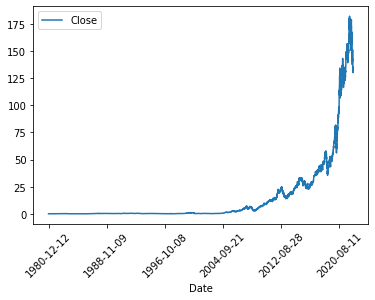

In [27]:
dataframe = dataset.dropna()
dataframe.plot(x='Date', y='Close')
plt.xticks(rotation = 45)
plt.plot()

# Creating model-Random forest because accuracy > 99.98%

In [28]:
model = RandomForestRegressor()
x = dataset.iloc[:len(dataset),[1,2,3]].values
y = dataset.iloc[:len(dataset),[4]].values
print(x)
print()
print(y)
print()
xtrn, xtst, ytrn, ytst = train_test_split(x,y, test_size = 0.2)
model.fit(xtrn,ytrn)
print()
print()
print("Accuracy is ->",model.score(xtst,ytst))
print()
print()

[[1.28e-01 1.29e-01 1.28e-01]
 [1.22e-01 1.22e-01 1.22e-01]
 [1.13e-01 1.13e-01 1.13e-01]
 ...
 [1.34e+02 1.37e+02 1.32e+02]
 [1.32e+02 1.32e+02 1.29e+02]
 [1.30e+02 1.33e+02 1.30e+02]]

[[1.28e-01]
 [1.22e-01]
 [1.13e-01]
 ...
 [1.35e+02]
 [1.30e+02]
 [1.32e+02]]



<ipython-input-28-66f1259694d6>:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(xtrn,ytrn)




Accuracy is -> 0.9998883504606505




# Predicting test set

In [29]:
pred = model.predict(xtst)
np.set_printoptions(precision=2)
table = pd.DataFrame(np.concatenate((ytst.reshape(len(pred), 1),pred.reshape(len(pred), 1)), 1), columns=['Actual','Predicted'])
print(table)

         Actual  Predicted
0      0.359286   0.363941
1      0.095424   0.095072
2      0.329241   0.330812
3      6.005714   5.959818
4      0.093192   0.093209
...         ...        ...
2089   2.547143   2.474339
2090  35.982498  35.910425
2091   0.421875   0.421393
2092   0.400357   0.399815
2093  25.254999  25.402550

[2094 rows x 2 columns]


# Visualising accuracy

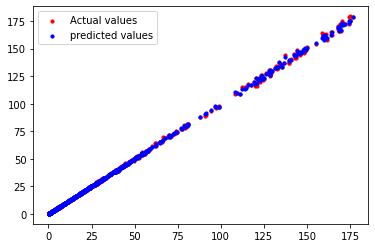

In [30]:
xax = xtst[:,0]
plt.scatter(xax, ytst, s = 10, color = 'red', label = 'Actual values')
plt.scatter(xax, pred, s = 10, color = 'blue', label = 'predicted values')
plt.legend()
plt.show()

# Accuracy is **99.98%**

# Suggesting customer

In [39]:
#rsi function
def calculate_rsi(prices, n=14):
    deltas = np.diff(prices)
    seed = deltas[:n + 1]
    up = seed[seed >= 0].sum() / n
    down = -seed[seed < 0].sum() / n
    rs = up / down
    rsi = np.zeros_like(prices)
    rsi[:n] = 100. - 100. / (1. + rs)

    for i in range(n, len(prices)):
        delta = deltas[i - 1]  # cause the diff is 1 shorter
        if delta > 0:
            upval = delta
            downval = 0.
        else:
            upval = 0.
            downval = -delta

        up = (up * (n - 1) + upval) / n
        down = (down * (n - 1) + downval) / n

        rs = up / down
        rsi[i] = 100. - 100. / (1. + rs)

    return rsi

#ema function
def calculate_ema(data, time_period):
    # Convert the closing prices into a pandas DataFrame
    df = pd.DataFrame(data, columns=['Close'])
    # Calculate the multiplier
    multiplier = 2 / (time_period + 1)
    # Calculate the initial SMA
    initial_sma = df['Close'][:time_period].mean()
    # Create a list to store the EMAs
    ema_values = [initial_sma]
    # Loop through the rest of the data and calculate the EMAs
    for i in range(time_period, len(df)):
        close = df['Close'][i]
        prev_ema = ema_values[-1]
        ema = (close - prev_ema) * multiplier + prev_ema
        ema_values.append(ema)
    # Convert the list of EMAs back into a numpy array and return it
    return np.array(ema_values)

#macd function
def get_latest_macd(data, fast_period=12, slow_period=26, signal_period=9):
    """
    Calculates the Moving Average Convergence Divergence (MACD) indicator for a given stock price data
    and returns the MACD and Signal values for the latest date.

    Parameters:
    data (pd.DataFrame): The stock price data with 'Date' and 'Close' columns.
    fast_period (int): The fast EMA period. Default is 12.
    slow_period (int): The slow EMA period. Default is 26.
    signal_period (int): The signal EMA period. Default is 9.

    Returns:
    macd (float): The MACD indicator value for the latest date.
    signal (float): The Signal value for the latest date.
    """

    # Calculate the fast and slow EMA
    fast_ema = data.ewm(span=fast_period, adjust=False).mean()
    slow_ema = data.ewm(span=slow_period, adjust=False).mean()

    # Calculate the MACD line and signal line
    macd_line = fast_ema - slow_ema
    signal_line = macd_line.ewm(span=signal_period, adjust=False).mean()

    # Get the MACD and Signal values for the latest date
    latest_macd = macd_line.iloc[-1]
    latest_signal = signal_line.iloc[-1]

    return latest_macd, latest_signal

#functions for determing whether to buy or not

def rsig30l60(rsi):
    if rsi > 30 and rsi < 60:
        return 1
    else:
        return 0

def ema50g200(e50,e200):
    if e50>e200:
        return 1
    else:
        return 0

def ema13g26(e13,e26):
    if e13>e26:
        return 1
    else:
        return 0
def macdposi(macd):
    if macd>0:
        return 1
    else:
        return 0
#final function to decide to buy or not
def buyf(rsif,ema1f,ema2f,macdposif):
    a = rsif + ema1f + ema2f + macdposif
    if a > 2:
        return True
    else:
        return False

#functions for determing whether to sell or not

def rsig60(rsi):
    if rsi > 60:
        return 1
    else:
        return 0

def ema50l200(e50,e200):
    if e50<e200:
        return 1
    else:
        return 0

def ema13l26(e13,e26):
    if e13<e26:
        return 1
    else:
        return 0
def macdneg(macd):
    if macd<0:
        return 1
    else:
        return 0
#final function to decide to sell or not
def sellf(rsif,ema1f,ema2f,macdnegf):
    a = rsif + ema1f + ema2f + macdnegf
    if a > 2:
        return True
    else:
        return False

# print(dataset.iloc[:,4])
rsi = calculate_rsi(dataset.iloc[:,4].values,14)
recent_rsi = rsi[-1]
ema13 = calculate_ema(dataset.iloc[:,4].values,13)
recent_ema13 = ema13[-1]
ema26 = calculate_ema(dataset.iloc[:,4].values,26)
recent_ema26 = ema26[-1]
ema50 = calculate_ema(dataset.iloc[:,4].values,50)
recent_ema50 = ema50[-1]
ema200 = calculate_ema(dataset.iloc[:,4].values,200)
recent_ema200 = ema200[-1]
# print(recent_ema13,recent_ema26)
macd_latest, macd_signal = get_latest_macd(dataset.iloc[:,4])
# print(recent_ema13,recent_ema26,recent_ema50,recent_ema200)
buy = buyf(rsig30l60(recent_rsi), ema50g200(recent_ema50,recent_ema200), ema13g26(recent_ema13,recent_ema26),macdposi(macd_latest))
sell = sellf(rsig60(recent_rsi), ema50l200(recent_ema50,recent_ema200), ema13l26(recent_ema13,recent_ema26),macdneg(macd_latest))
print(sell)
print(buy)


True
False


# Simulation for past 67 days
67 just because computation is too heavy

In [40]:
# startpoint = 4816
startpoint = 10400
endpoint = 10467
ds = pd.read_csv('stockdata.csv')
#investing 100k in APPLE stocks
pocket = 100000
stocks = 0
print("Initial investment : ", pocket)
for i in range(startpoint,endpoint):
    rsi = calculate_rsi(dataset.iloc[:i,4].values,14)
    recent_rsi = rsi[-1]
    ema13 = calculate_ema(dataset.iloc[:i,4].values,13)
    recent_ema13 = ema13[-1]
    ema26 = calculate_ema(dataset.iloc[:i,4].values,26)
    recent_ema26 = ema26[-1]
    ema50 = calculate_ema(dataset.iloc[:i,4].values,50)
    recent_ema50 = ema50[-1]
    ema200 = calculate_ema(dataset.iloc[:i,4].values,200)
    recent_ema200 = ema200[-1]
    # print(recent_ema13,recent_ema26)
    macd_latest, macd_signal = get_latest_macd(dataset.iloc[:i,4])
    # print(recent_ema13,recent_ema26,recent_ema50,recent_ema200)
    buy = buyf(rsig30l60(recent_rsi), ema50g200(recent_ema50,recent_ema200), ema13g26(recent_ema13,recent_ema26),macdposi(macd_latest))
    sell = sellf(rsig60(recent_rsi), ema50l200(recent_ema50,recent_ema200), ema13l26(recent_ema13,recent_ema26),macdneg(macd_latest))
    if(buy):
        if pocket>0:
            stocks = pocket/dataset.iloc[:i,4].values[-1]
            pocket = 0
    if(sell):
        if stocks>0:
             pocket = stocks*dataset.iloc[:i,4].values[-1]
print("After using this model : ", pocket+stocks*dataset.iloc[:-1,4].values[-1])


Initial investment :  100000
After using this model :  152519.09020719462


# Investment -> 100000
# After applying model -> 152519.09020719462
# Profit -> **52519.09021**